In [2]:
import pandas as pd
import numpy as np 

# read all csv files to pd dfs - skiprows=19 will skip first 19 lines and try to read from 20th line where the data we want is - code also added, sep parameter, to not recognize/pull in blank spaces from csv

DonegalMonthlydf = pd.read_csv('C:/Users./BYO User/UCD Data Project/Downloads for Data Project/DonegalMonthly.csv', skiprows=19, sep = '\s*,\s*', engine = 'python')
WestmeathMonthlydf = pd.read_csv('C:/Users./BYO User/UCD Data Project/Downloads for Data Project/WestmeathMonthly.csv', skiprows=19, sep = '\s*,\s*', engine = 'python')
MayoMonthlydf = pd.read_csv('C:/Users./BYO User/UCD Data Project/Downloads for Data Project/MayoMonthly.csv', skiprows=19, sep = '\s*,\s*', engine = 'python')
CorkMonthlydf = pd.read_csv('C:/Users./BYO User/UCD Data Project/Downloads for Data Project/CorkMonthly.csv', skiprows=19, sep = '\s*,\s*', engine = 'python')
DublinMonthlydf = pd.read_csv('C:/Users./BYO User/UCD Data Project/Downloads for Data Project/DublinMonthly.csv', skiprows=19, sep = '\s*,\s*', engine = 'python')

#print the data frames
print(DonegalMonthlydf)
print(WestmeathMonthlydf)
print(MayoMonthlydf)
print(CorkMonthlydf)
print(DublinMonthlydf)

     year  month  meant  maxtp  mintp  mnmax  mnmin   rain  gmin  wdsp  maxgt  \
0    1955      5    9.5   20.2    1.4   12.3    6.6   70.1  -0.6  14.6   48.0   
1    1955      6   12.4   18.8    6.6   14.7   10.0   83.2  -0.3  12.9   58.0   
2    1955      7   14.8   21.3    8.8   17.5   12.1   22.1   4.5   6.2   33.0   
3    1955      8   15.8   27.1    9.5   18.7   12.9   27.3   5.6   8.1   47.0   
4    1955      9   13.9   23.4    7.7   16.5   11.2  114.2   4.4  16.0   50.0   
..    ...    ...    ...    ...    ...    ...    ...    ...   ...   ...    ...   
803  2022      4    8.6   16.0    1.7   11.5    5.8   84.2  -2.4  13.6   50.0   
804  2022      5   11.9   19.4    8.0   14.3    9.4   74.8   2.1  14.3   41.0   
805  2022      6   13.3   18.8    7.7   15.8   10.8   66.4   2.6  13.4   43.0   
806  2022      7   14.6   23.0    8.9   17.0   12.3   66.3   8.5  11.7   40.0   
807  2022      8   14.7   21.1    7.7   17.5   12.0   44.1   5.1  11.0   35.0   

       sun  
0    250.1  
1

In [3]:
# carve up into 5 subset dataframes using iloc. Each df will be for the time period we want 2001-2021

DonegalMonthlyData = DonegalMonthlydf.iloc[548:800 , 0:13].copy()
WestmeathMonthlyData = WestmeathMonthlydf.iloc[612:864 , 0:13].copy()
MayoMonthlyData = MayoMonthlydf.iloc[52:303 , 0:13].copy()
CorkMonthlyData = CorkMonthlydf.iloc[468:719 , 0:13].copy()
DublinMonthlyData = DublinMonthlydf.iloc[710:961 , 0:13].copy()

In [4]:
# adding location column to each dataframe

DonegalMonthlyData['Location'] = "Donegal"
WestmeathMonthlyData['Location'] = "Westmeath"
MayoMonthlyData['Location'] = "Mayo"
CorkMonthlyData['Location'] = "Cork"
DublinMonthlyData['Location'] = "Dublin"

In [5]:
# use .info to show the dataframe dtypes information and datatype - note Cork data has mxgt column as int64 so we will convert to float64 to be consistent before we merge the dataframes

DonegalMonthlyData.info()
WestmeathMonthlyData.info()
MayoMonthlyData.info()
CorkMonthlyData.info()
DublinMonthlyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 548 to 799
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      252 non-null    int64  
 1   month     252 non-null    int64  
 2   meant     252 non-null    float64
 3   maxtp     252 non-null    float64
 4   mintp     252 non-null    float64
 5   mnmax     252 non-null    float64
 6   mnmin     252 non-null    float64
 7   rain      252 non-null    float64
 8   gmin      252 non-null    float64
 9   wdsp      251 non-null    float64
 10  maxgt     252 non-null    float64
 11  sun       120 non-null    float64
 12  Location  252 non-null    object 
dtypes: float64(10), int64(2), object(1)
memory usage: 25.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 612 to 863
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      252 non-null    int64  
 1   month     252 n

In [6]:
# convert Cork maxgt column dtype int64 to float64 so that we can be consistent across all dataframes when we merge

CorkMonthlyData['maxgt'] = CorkMonthlyData['maxgt'].astype(float)
CorkMonthlyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 468 to 718
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      251 non-null    int64  
 1   month     251 non-null    int64  
 2   meant     251 non-null    float64
 3   maxtp     251 non-null    float64
 4   mintp     251 non-null    float64
 5   mnmax     251 non-null    float64
 6   mnmin     251 non-null    float64
 7   rain      251 non-null    float64
 8   gmin      251 non-null    float64
 9   wdsp      251 non-null    float64
 10  maxgt     251 non-null    float64
 11  sun       251 non-null    float64
 12  Location  251 non-null    object 
dtypes: float64(10), int64(2), object(1)
memory usage: 25.6+ KB


In [7]:
# Starting with Donegal we will show some basic statistical results on the dataframe, identify and replace missing values

DonegalMonthlyData.describe()

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,251.000000,252.000000,120.000000
mean,2011.000000,6.500000,9.998016,17.056746,3.344841,12.414286,7.586508,93.904365,0.357937,14.686454,54.408730,115.875833
std,6.067351,3.458922,3.254044,4.177343,3.659808,3.365094,3.183369,41.966387,3.749366,2.947700,10.994185,59.893160
min,2001.000000,1.000000,4.000000,8.900000,-3.600000,6.000000,1.800000,15.100000,-6.900000,7.800000,30.000000,14.900000
25%,2006.000000,3.750000,7.100000,13.175000,0.400000,9.400000,4.775000,65.825000,-2.125000,12.400000,46.000000,63.850000
50%,2011.000000,6.500000,9.700000,17.050000,2.350000,12.250000,7.300000,86.850000,-0.250000,14.700000,54.000000,109.000000
75%,2016.000000,9.250000,13.300000,20.700000,7.000000,15.600000,10.800000,115.775000,3.625000,16.900000,62.000000,158.400000
max,2021.000000,12.000000,16.100000,25.900000,11.100000,19.100000,13.200000,272.900000,9.100000,22.300000,91.000000,280.800000


In [8]:
# Donegal identify and replace missing values

DonegalMonthlyData.isna().sum()

year          0
month         0
meant         0
maxtp         0
mintp         0
mnmax         0
mnmin         0
rain          0
gmin          0
wdsp          1
maxgt         0
sun         132
Location      0
dtype: int64

In [9]:
# locate the missing values for pre change review using .loc, .isnull and .any with axis set to 1 to perform on columns that satisy condition 
# too many to show below - note row 668 where we will refer back to later to show NaN replaced

DonegalMonthlyData.loc[DonegalMonthlyData.isnull().any(axis=1)]

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,Location
668,2011,1,5.1,11.7,-3.6,7.4,2.7,89.6,-6.6,13.7,51.0,NaN,Donegal
669,2011,2,6.6,13.5,0.2,9.4,3.8,105.5,-4.1,15.3,74.0,NaN,Donegal
670,2011,3,6.8,15.4,0.4,9.5,4.2,59.0,-3.5,12.2,56.0,NaN,Donegal
671,2011,4,10.7,20.8,5.5,14.0,7.3,66.2,-0.9,12.5,45.0,NaN,Donegal
672,2011,5,11.0,18.3,5.9,13.7,8.4,100.4,3.0,19.4,73.0,NaN,Donegal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2021,8,14.4,20.3,9.0,16.7,12.1,69.1,4.9,9.2,39.0,NaN,Donegal
796,2021,9,14.3,22.8,7.8,16.9,11.7,68.3,5.5,11.2,44.0,NaN,Donegal
797,2021,10,11.8,18.3,4.9,14.1,9.5,156.2,2.8,14.9,52.0,NaN,Donegal
798,2021,11,9.6,15.6,3.7,11.4,7.7,95.4,2.5,18.6,70.0,NaN,Donegal


In [10]:
# identify MIN and MAX in wdsp and sun

Donegal_wdsp_min = DonegalMonthlyData['wdsp'].loc[DonegalMonthlyData['wdsp'].idxmin()]
Donegal_wdsp_max = DonegalMonthlyData['wdsp'].loc[DonegalMonthlyData['wdsp'].idxmax()]
Donegal_sun_min = DonegalMonthlyData['sun'].loc[DonegalMonthlyData['sun'].idxmin()]
Donegal_sun_max = DonegalMonthlyData['sun'].loc[DonegalMonthlyData['sun'].idxmax()]

print(Donegal_wdsp_min)
print(Donegal_wdsp_max)
print(Donegal_sun_min)
print(Donegal_sun_max)

7.8
22.3
14.9
280.8


In [11]:
# code to replace NaN values with random number between the min and max range we have identified in wdsp and sun columns

DonegalMonthlyData['wdsp'] = DonegalMonthlyData['wdsp'].mask(DonegalMonthlyData['wdsp'].isna(), np.random.uniform(7.8, 22.3, size=len(DonegalMonthlyData)))
DonegalMonthlyData['sun'] = DonegalMonthlyData['sun'].mask(DonegalMonthlyData['sun'].isna(), np.random.uniform(14.9, 280.8, size=len(DonegalMonthlyData)))

In [12]:
# referring back to row 668 which we mentioned earlier - this should now have it's NaN value replaced

DonegalMonthlyData.loc[[668]]

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,Location
668,2011,1,5.1,11.7,-3.6,7.4,2.7,89.6,-6.6,13.7,51.0,115.911801,Donegal


In [13]:
# check dataframe to see if NaN values have been replaced as per our request and note decimal places have changed post changes
DonegalMonthlyData

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,Location
548,2001,1,4.7,9.4,-1.7,6.7,2.7,61.5,-4.5,15.7,57.0,77.700000,Donegal
549,2001,2,5.1,11.3,-0.7,7.4,2.9,86.5,-2.5,17.2,58.0,88.700000,Donegal
550,2001,3,5.3,13.1,-2.5,7.5,3.1,29.4,-4.5,17.4,66.0,125.000000,Donegal
551,2001,4,7.3,14.9,2.2,9.7,4.9,54.2,-0.2,13.9,57.0,152.000000,Donegal
552,2001,5,11.3,22.3,3.7,14.2,8.4,34.2,2.2,9.7,58.0,221.900000,Donegal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2021,8,14.4,20.3,9.0,16.7,12.1,69.1,4.9,9.2,39.0,243.172132,Donegal
796,2021,9,14.3,22.8,7.8,16.9,11.7,68.3,5.5,11.2,44.0,264.657531,Donegal
797,2021,10,11.8,18.3,4.9,14.1,9.5,156.2,2.8,14.9,52.0,227.700281,Donegal
798,2021,11,9.6,15.6,3.7,11.4,7.7,95.4,2.5,18.6,70.0,155.021619,Donegal


In [14]:
# amending the missing values has caused the float number of figures after decimal point to expand
# change decimal point back to 1 place and view again toensure decimal places have reverted to what we want e.g. 1 place

pd.set_option('display.float_format', '{:.1f}'.format)
DonegalMonthlyData

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,Location
548,2001,1,4.7,9.4,-1.7,6.7,2.7,61.5,-4.5,15.7,57.0,77.7,Donegal
549,2001,2,5.1,11.3,-0.7,7.4,2.9,86.5,-2.5,17.2,58.0,88.7,Donegal
550,2001,3,5.3,13.1,-2.5,7.5,3.1,29.4,-4.5,17.4,66.0,125.0,Donegal
551,2001,4,7.3,14.9,2.2,9.7,4.9,54.2,-0.2,13.9,57.0,152.0,Donegal
552,2001,5,11.3,22.3,3.7,14.2,8.4,34.2,2.2,9.7,58.0,221.9,Donegal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2021,8,14.4,20.3,9.0,16.7,12.1,69.1,4.9,9.2,39.0,243.2,Donegal
796,2021,9,14.3,22.8,7.8,16.9,11.7,68.3,5.5,11.2,44.0,264.7,Donegal
797,2021,10,11.8,18.3,4.9,14.1,9.5,156.2,2.8,14.9,52.0,227.7,Donegal
798,2021,11,9.6,15.6,3.7,11.4,7.7,95.4,2.5,18.6,70.0,155.0,Donegal


In [15]:
# we can now confirm that all NaN values have been replaced by running the .isna function again

DonegalMonthlyData.isna().sum()

year        0
month       0
meant       0
maxtp       0
mintp       0
mnmax       0
mnmin       0
rain        0
gmin        0
wdsp        0
maxgt       0
sun         0
Location    0
dtype: int64

In [16]:
# Next - Westmeath - we will show some basic statistical results on the dataframe, identify and replace missing values

WestmeathMonthlyData.describe()

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
count,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,251.0,252.0,252.0,72.0
mean,2011.0,6.5,9.4,18.1,-0.5,13.3,5.5,83.0,-4.7,6.3,34.9,120.9
std,6.1,3.5,4.0,4.9,4.3,4.4,3.6,42.0,4.5,1.2,7.2,47.0
min,2001.0,1.0,-1.1,9.2,-14.1,2.4,-4.6,10.1,-16.6,3.6,20.0,37.6
25%,2006.0,3.8,5.9,13.5,-3.7,9.1,2.4,52.2,-8.2,5.5,29.0,87.2
50%,2011.0,6.5,8.9,17.6,-1.1,13.1,5.0,75.3,-5.2,6.1,34.0,115.8
75%,2016.0,9.2,13.1,22.3,3.6,17.5,8.8,107.8,-0.6,7.0,40.0,151.8
max,2021.0,12.0,17.3,29.5,9.1,22.6,12.4,274.3,5.2,10.3,58.0,233.3


In [17]:
# Westmeath identify and replace missing values

WestmeathMonthlyData.isna().sum()

year          0
month         0
meant         0
maxtp         0
mintp         0
mnmax         0
mnmin         0
rain          0
gmin          1
wdsp          0
maxgt         0
sun         180
Location      0
dtype: int64

In [18]:
# locate the missing values for pre change review using .loc, .isnull and .any with axis set to 1 to perform on columns that satisy condition 
# too many to show below - note row 684 where we will refer back to later to show NaN replaced

WestmeathMonthlyData.loc[WestmeathMonthlyData.isnull().any(axis=1)]

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,Location
684,2007,1,6.2,12.5,-1.8,8.8,3.5,125.9,-7.6,8.5,51.0,NaN,Westmeath
685,2007,2,5.0,12.8,-6.7,8.6,1.5,79.1,-11.7,6.5,40.0,NaN,Westmeath
686,2007,3,6.0,13.6,-2.9,10.5,1.5,71.6,-6.5,7.0,41.0,NaN,Westmeath
687,2007,4,10.4,20.6,-1.1,15.7,5.0,26.0,-4.7,5.2,29.0,NaN,Westmeath
688,2007,5,10.4,21.7,0.6,15.0,5.8,69.3,-3.1,6.3,35.0,NaN,Westmeath
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,2021,8,14.9,23.9,4.8,19.2,10.6,142.1,1.2,4.7,30.0,NaN,Westmeath
860,2021,9,14.5,25.4,4.4,18.4,10.6,58.1,-0.5,4.7,25.0,NaN,Westmeath
861,2021,10,11.4,19.3,2.8,14.7,8.0,97.7,-1.5,6.1,32.0,NaN,Westmeath
862,2021,11,7.8,16.5,0.2,10.7,4.9,41.6,-4.7,5.5,30.0,NaN,Westmeath


In [19]:
# identify MIN and MAX in gmin and sun columns

Westmeath_gmin_min = WestmeathMonthlyData['gmin'].loc[WestmeathMonthlyData['gmin'].idxmin()]
Westmeath_gmin_max = WestmeathMonthlyData['gmin'].loc[WestmeathMonthlyData['gmin'].idxmax()]
Westmeath_sun_min = WestmeathMonthlyData['sun'].loc[WestmeathMonthlyData['sun'].idxmin()]
Westmeath_sun_max = WestmeathMonthlyData['sun'].loc[WestmeathMonthlyData['sun'].idxmax()]

print(Westmeath_gmin_min)
print(Westmeath_gmin_max)
print(Westmeath_sun_min)
print(Westmeath_sun_max)

-16.6
5.2
37.6
233.3


In [20]:
# code to replace NaN values with random number between the min and max range we have identified in gmin and sun columns

WestmeathMonthlyData['gmin'] = WestmeathMonthlyData['gmin'].mask(WestmeathMonthlyData['gmin'].isna(), np.random.uniform(-16.6, 5.2, size=len(WestmeathMonthlyData)))
WestmeathMonthlyData['sun'] = WestmeathMonthlyData['sun'].mask(WestmeathMonthlyData['sun'].isna(), np.random.uniform(37.6, 233.3, size=len(WestmeathMonthlyData)))

# use .loc to show a row e.g. 684 which we identified from above and see that it is now updated with a random number from our defined min/max range and no longer showing as NaN

WestmeathMonthlyData.loc[[684]]

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,Location
684,2007,1,6.2,12.5,-1.8,8.8,3.5,125.9,-7.6,8.5,51.0,190.1,Westmeath


In [21]:
# we can now confirm that all NaN values have been replaced by running the .isna function again

WestmeathMonthlyData.isna().sum()

year        0
month       0
meant       0
maxtp       0
mintp       0
mnmax       0
mnmin       0
rain        0
gmin        0
wdsp        0
maxgt       0
sun         0
Location    0
dtype: int64

In [22]:
# Next - Mayo - we will show some basic statistical results on the dataframe, identify and replace missing values

MayoMonthlyData.describe()

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
count,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,230.0
mean,2011.0,6.5,8.9,16.8,1.6,12.0,5.8,113.4,-1.6,9.4,45.5,99.7
std,6.1,3.5,3.7,4.9,3.9,4.1,3.4,51.9,4.1,1.5,9.3,49.2
min,2001.0,1.0,0.6,8.4,-7.4,2.8,-1.5,18.7,-13.6,6.1,27.0,15.5
25%,2006.0,4.0,5.5,12.1,-1.4,8.1,2.8,73.7,-4.7,8.4,38.5,61.6
50%,2011.0,7.0,8.5,16.2,0.9,11.9,5.4,105.9,-1.8,9.2,44.0,95.2
75%,2016.0,9.5,12.4,20.6,5.5,15.8,9.1,143.9,1.7,10.3,51.0,131.4
max,2021.0,12.0,16.8,28.9,9.8,21.1,12.5,347.8,7.4,14.4,84.0,223.0


In [23]:
# Mayo identify and replace missing values

MayoMonthlyData.isna().sum()

year         0
month        0
meant        0
maxtp        0
mintp        0
mnmax        0
mnmin        0
rain         0
gmin         0
wdsp         0
maxgt        0
sun         21
Location     0
dtype: int64

In [24]:
# locate the missing values for pre change review using .loc, .isnull and .any with axis set to 1 to perform on columns that satisy condition 
# too many to show below - note row 282 where we will refer back to later to show NaN replaced

MayoMonthlyData.loc[MayoMonthlyData.isnull().any(axis=1)]

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,Location
282,2020,4,9.3,18.5,0.0,13.7,4.9,21.0,-1.9,8.2,37.0,NaN,Mayo
283,2020,5,11.4,24.3,0.2,15.9,6.8,30.8,-2.2,9.2,48.0,NaN,Mayo
284,2020,6,12.3,24.3,4.8,15.6,9.0,126.8,2.0,9.4,42.0,NaN,Mayo
285,2020,7,12.6,20.0,6.6,15.6,9.7,159.6,6.4,8.8,44.0,NaN,Mayo
286,2020,8,14.6,22.9,5.8,17.9,11.3,104.9,4.5,7.7,49.0,NaN,Mayo
287,2020,9,12.0,19.7,3.7,15.2,8.8,75.4,0.2,8.6,39.0,NaN,Mayo
288,2020,10,8.6,13.8,1.8,11.3,5.8,178.8,0.1,10.2,57.0,NaN,Mayo
289,2020,11,7.2,13.3,1.0,9.6,4.8,129.3,-1.3,9.5,42.0,NaN,Mayo
290,2020,12,4.3,10.0,-2.1,6.5,2.0,161.8,-4.4,10.0,53.0,NaN,Mayo
291,2021,1,3.5,9.9,-2.4,5.7,1.2,129.3,-6.7,8.2,38.0,NaN,Mayo


In [25]:
# identify MIN and MAX in sun column

Mayo_sun_min = MayoMonthlyData['sun'].loc[MayoMonthlyData['sun'].idxmin()]
Mayo_sun_max = MayoMonthlyData['sun'].loc[MayoMonthlyData['sun'].idxmax()]

print(Mayo_sun_min)
print(Mayo_sun_max)

15.5
223.0


In [26]:
# code to replace NaN values with random number between the min and max range we have identified in mintp
MayoMonthlyData['sun'] = MayoMonthlyData['sun'].mask(MayoMonthlyData['sun'].isna(), np.random.uniform(15.5, 223.0, size=len(MayoMonthlyData)))

# use .loc to show a row e.g. 282 which we identified from above and see that it is now updated with a random number from our defined min/max range and no longer showing as NaN

MayoMonthlyData.loc[[282]]

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,Location
282,2020,4,9.3,18.5,0.0,13.7,4.9,21.0,-1.9,8.2,37.0,133.5,Mayo


In [27]:
# Next - Cork - we will show some basic statistical results on the dataframe, identify and replace missing values

CorkMonthlyData.describe()

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
count,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0
mean,2011.0,6.5,10.0,17.2,2.5,13.1,6.9,102.8,-1.9,9.6,44.3,124.8
std,6.1,3.5,3.6,4.3,3.8,4.0,3.3,56.8,3.9,1.5,8.8,54.5
min,2001.0,1.0,1.7,9.6,-7.2,4.0,-0.5,10.4,-10.3,6.4,27.0,24.3
25%,2006.0,4.0,6.8,13.4,-0.5,9.4,4.0,59.6,-4.8,8.6,38.0,76.6
50%,2011.0,7.0,9.5,16.7,1.9,12.8,6.5,91.7,-2.2,9.5,44.0,123.2
75%,2016.0,9.5,13.5,20.8,6.0,16.9,10.2,135.4,1.4,10.4,50.0,164.0
max,2021.0,12.0,17.4,26.7,9.9,21.9,13.3,402.2,6.9,14.8,71.0,264.5


In [28]:
# Cork identify and replace missing values

CorkMonthlyData.isna().sum()

year        0
month       0
meant       0
maxtp       0
mintp       0
mnmax       0
mnmin       0
rain        0
gmin        0
wdsp        0
maxgt       0
sun         0
Location    0
dtype: int64

In [29]:
# Finally - Dublin - we will show some basic statistical results on the dataframe, identify and replace missing values

DublinMonthlyData.describe()

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
count,251.0,251.0,251.0,251.0,251.0,251.0,251.0,251.0,250.0,251.0,251.0,251.0
mean,2011.0,6.5,9.6,18.2,-0.0,13.4,5.8,64.7,-3.7,10.5,44.0,125.9
std,6.1,3.5,3.8,4.4,4.1,4.3,3.5,36.9,4.4,1.9,8.6,53.1
min,2001.0,1.0,-0.1,9.3,-12.2,3.3,-3.5,4.8,-12.6,6.5,28.0,30.5
25%,2006.0,4.0,6.4,14.2,-3.0,9.6,2.9,38.5,-7.0,9.2,37.5,81.0
50%,2011.0,7.0,9.1,17.7,-0.6,13.0,5.4,57.6,-4.0,10.2,43.0,125.4
75%,2016.0,9.5,13.1,22.2,3.5,17.4,8.9,83.5,-0.2,11.5,49.0,159.9
max,2021.0,12.0,16.9,26.9,9.2,22.0,12.3,193.5,6.4,16.3,80.0,295.0


In [30]:
# Dublin identify and replace missing values

DublinMonthlyData.isna().sum()

year        0
month       0
meant       0
maxtp       0
mintp       0
mnmax       0
mnmin       0
rain        0
gmin        1
wdsp        0
maxgt       0
sun         0
Location    0
dtype: int64

In [31]:
# locate the missing values for pre change review using .loc, .isnull and .any with axis set to 1 to perform on columns that satisy condition 
# too many to show below - note row 829 where we will refer back to later to show NaN replaced

DublinMonthlyData.loc[DublinMonthlyData.isnull().any(axis=1)]

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,Location
829,2010,12,-0.1,11.7,-12.2,3.3,-3.5,58.1,NaN,8.4,37.0,60.3,Dublin


In [32]:
# identify MIN and MAX in gmin column

Dublin_gmin_min = DublinMonthlyData['gmin'].loc[DublinMonthlyData['gmin'].idxmin()]
Dublin_gmin_max = DublinMonthlyData['gmin'].loc[DublinMonthlyData['gmin'].idxmax()]
print(Dublin_gmin_min)
print(Dublin_gmin_max)

-12.6
6.4


In [33]:
# code to replace NaN values with random number between the min and max range we have identified in mintp
DublinMonthlyData['gmin'] = DublinMonthlyData['gmin'].mask(DublinMonthlyData['gmin'].isna(), np.random.uniform(-12.6, 6.4, size=len(DublinMonthlyData)))

# use .loc to show row 829 which we identified from above and see that it is now updated with a random number from our defined min/max range and no longer showing as NaN

DublinMonthlyData.loc[[829]]

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,Location
829,2010,12,-0.1,11.7,-12.2,3.3,-3.5,58.1,1.3,8.4,37.0,60.3,Dublin


In [34]:
# we can now confirm that all NaN values have been replaced by running the .isna function again

DublinMonthlyData.isna().sum()

year        0
month       0
meant       0
maxtp       0
mintp       0
mnmax       0
mnmin       0
rain        0
gmin        0
wdsp        0
maxgt       0
sun         0
Location    0
dtype: int64

In [35]:
# use .info to show the dataframe dtypes information and datatype and see if our numbers of rows and columns are consistent

DonegalMonthlyData.info()
WestmeathMonthlyData.info()
MayoMonthlyData.info()
CorkMonthlyData.info()
DublinMonthlyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 548 to 799
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      252 non-null    int64  
 1   month     252 non-null    int64  
 2   meant     252 non-null    float64
 3   maxtp     252 non-null    float64
 4   mintp     252 non-null    float64
 5   mnmax     252 non-null    float64
 6   mnmin     252 non-null    float64
 7   rain      252 non-null    float64
 8   gmin      252 non-null    float64
 9   wdsp      252 non-null    float64
 10  maxgt     252 non-null    float64
 11  sun       252 non-null    float64
 12  Location  252 non-null    object 
dtypes: float64(10), int64(2), object(1)
memory usage: 25.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 612 to 863
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      252 non-null    int64  
 1   month     252 n

In [36]:
# we find that they are not consistent
# We are missing x1 row in Mayo / Cork / Dublin
# after looking through raw csv files again I located missing row which was for March 2020 for Mayo/Cork/Dublin

# find missing row index for Mayo March 2020

MayoMonthlyData.iloc[-24:-14]

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,Location
279,2019,12,5.2,11.2,-1.1,7.4,3.0,174.0,-5.1,10.6,63.0,47.6,Mayo
280,2020,1,5.0,11.7,-1.9,7.3,2.7,122.5,-5.8,10.4,55.0,39.3,Mayo
281,2020,2,4.2,9.9,-1.1,7.1,1.3,277.4,-2.3,13.6,58.0,54.5,Mayo
282,2020,4,9.3,18.5,0.0,13.7,4.9,21.0,-1.9,8.2,37.0,133.5,Mayo
283,2020,5,11.4,24.3,0.2,15.9,6.8,30.8,-2.2,9.2,48.0,22.9,Mayo
284,2020,6,12.3,24.3,4.8,15.6,9.0,126.8,2.0,9.4,42.0,197.5,Mayo
285,2020,7,12.6,20.0,6.6,15.6,9.7,159.6,6.4,8.8,44.0,110.8,Mayo
286,2020,8,14.6,22.9,5.8,17.9,11.3,104.9,4.5,7.7,49.0,89.7,Mayo
287,2020,9,12.0,19.7,3.7,15.2,8.8,75.4,0.2,8.6,39.0,134.9,Mayo
288,2020,10,8.6,13.8,1.8,11.3,5.8,178.8,0.1,10.2,57.0,101.4,Mayo


In [37]:
# Inserting a Row at a Specific Index to go between Feb and Apr 2020 in Mayo df and use .loc again to see if it has been added
# new index will be added to bottom so use sort_index() to get month row data into correct position
# in this instance I will insert random numbers of my own choosing - somewhere between the Feb and Apr values of 2020

MayoMonthlyData.loc[281.5] = [2020, 3, 6.4, 14.7, 0.1, 10.6, 2.3, 121.4, -2.1, 11.1, 43.5, 39.9, 'Mayo']
MayoMonthlyData = MayoMonthlyData.sort_index()
MayoMonthlyData.iloc[-24:-14]

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,Location
280.0,2020,1,5.0,11.7,-1.9,7.3,2.7,122.5,-5.8,10.4,55.0,39.3,Mayo
281.0,2020,2,4.2,9.9,-1.1,7.1,1.3,277.4,-2.3,13.6,58.0,54.5,Mayo
281.5,2020,3,6.4,14.7,0.1,10.6,2.3,121.4,-2.1,11.1,43.5,39.9,Mayo
282.0,2020,4,9.3,18.5,0.0,13.7,4.9,21.0,-1.9,8.2,37.0,133.5,Mayo
283.0,2020,5,11.4,24.3,0.2,15.9,6.8,30.8,-2.2,9.2,48.0,22.9,Mayo
284.0,2020,6,12.3,24.3,4.8,15.6,9.0,126.8,2.0,9.4,42.0,197.5,Mayo
285.0,2020,7,12.6,20.0,6.6,15.6,9.7,159.6,6.4,8.8,44.0,110.8,Mayo
286.0,2020,8,14.6,22.9,5.8,17.9,11.3,104.9,4.5,7.7,49.0,89.7,Mayo
287.0,2020,9,12.0,19.7,3.7,15.2,8.8,75.4,0.2,8.6,39.0,134.9,Mayo
288.0,2020,10,8.6,13.8,1.8,11.3,5.8,178.8,0.1,10.2,57.0,101.4,Mayo


In [38]:
# reset the index

MayoMonthlyData.index = range(253)
MayoMonthlyData

ValueError: Length mismatch: Expected axis has 252 elements, new values have 253 elements

In [ ]:
# ensure new month added with data for Dublin March 2020 is now in correct position - noticed in Out43 I had added row 252 
# will need to drop this in next next In

MayoMonthlyData.iloc[-24:-14]

In [ ]:
# delete row index 252

MayoMonthlyData = MayoMonthlyData.drop(MayoMonthlyData.index [ [ 252] ])
MayoMonthlyData.iloc[-5:]

In [ ]:
# find missing row index for Cork March 2020

CorkMonthlyData.iloc[-24:-14]

In [ ]:
# Inserting a Row at a Specific Index to go between Feb and Apr 2020 in Cork df and use .loc again to see if it has been added
# new index will be added to bottom so use sort_index() to get month row data into correct position
# learning from the Mayo data I will simply add in my randmon manual float values at this stage

CorkMonthlyData.loc[697.5] = [2020, 3, 8.0, 15.1, 0.4, 10.7, 4.6, 128.9, -5.8, 12.3, 43.0, 141.1, 'Cork']
CorkMonthlyData = CorkMonthlyData.sort_index()
CorkMonthlyData.iloc[-24:]

In [ ]:
# reset the index to integer based look

CorkMonthlyData.index = range(252)
CorkMonthlyData

In [ ]:
# ensure new month added with data for Cork March 2020 is now in correct position

CorkMonthlyData.iloc[-24:]

In [ ]:
# find missing row index for Dublin March 2020

DublinMonthlyData.iloc[-24:-14]

In [ ]:
# Inserting a Row at a Specific Index to go between Feb and Apr 2020 in Dublin df and use .loc again to see if it has been added
# new index will be added to bottom so use sort_index() to get month row data into correct position
# learning from the Mayo and Cork data I will simply add in my randon manual float values at this stage

DublinMonthlyData.loc[939.5] = [2020, 3, 15.7, -2.4, 11.9, 3.1, 71.6, -6.5, 10.4, 42.0, 147.4, 155.0, 'Dublin']
DublinMonthlyData = DublinMonthlyData.sort_index()
DublinMonthlyData.iloc[-24:]

In [39]:
# reset the index

DublinMonthlyData.index = range(252)
DublinMonthlyData

ValueError: Length mismatch: Expected axis has 251 elements, new values have 252 elements

In [40]:
# ensure new month added with data for Dublin March 2020 is now in correct position

DublinMonthlyData.iloc[-24:]

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,Location
937,2019,12,5.9,13.8,-2.9,8.9,2.8,57.7,-7.0,9.2,46.0,60.0,Dublin
938,2020,1,6.3,14.2,-2.5,9.1,3.6,36.0,-5.3,9.7,48.0,65.0,Dublin
939,2020,2,5.8,13.4,-2.3,9.1,2.4,130.4,-6.2,13.1,48.0,103.2,Dublin
940,2020,4,8.5,19.4,-2.5,13.4,3.6,12.8,-6.7,8.4,38.0,188.2,Dublin
941,2020,5,10.9,21.5,-2.6,16.4,5.4,9.3,-5.8,8.6,46.0,295.0,Dublin
942,2020,6,13.4,25.0,3.8,17.7,9.0,69.6,0.6,9.2,39.0,130.0,Dublin
943,2020,7,14.4,23.1,5.0,18.2,10.7,98.9,1.6,8.9,39.0,104.2,Dublin
944,2020,8,14.7,24.0,3.8,18.6,10.8,87.1,1.3,8.5,39.0,97.1,Dublin
945,2020,9,12.8,22.7,0.9,17.0,8.7,60.9,-1.7,8.5,34.0,143.0,Dublin
946,2020,10,9.5,15.2,0.3,12.8,6.3,80.6,-2.9,10.4,41.0,120.6,Dublin


In [41]:
# Check each dataframe to ensure 252 rows by 13 columns

DonegalMonthlyData

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,Location
548,2001,1,4.7,9.4,-1.7,6.7,2.7,61.5,-4.5,15.7,57.0,77.7,Donegal
549,2001,2,5.1,11.3,-0.7,7.4,2.9,86.5,-2.5,17.2,58.0,88.7,Donegal
550,2001,3,5.3,13.1,-2.5,7.5,3.1,29.4,-4.5,17.4,66.0,125.0,Donegal
551,2001,4,7.3,14.9,2.2,9.7,4.9,54.2,-0.2,13.9,57.0,152.0,Donegal
552,2001,5,11.3,22.3,3.7,14.2,8.4,34.2,2.2,9.7,58.0,221.9,Donegal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2021,8,14.4,20.3,9.0,16.7,12.1,69.1,4.9,9.2,39.0,243.2,Donegal
796,2021,9,14.3,22.8,7.8,16.9,11.7,68.3,5.5,11.2,44.0,264.7,Donegal
797,2021,10,11.8,18.3,4.9,14.1,9.5,156.2,2.8,14.9,52.0,227.7,Donegal
798,2021,11,9.6,15.6,3.7,11.4,7.7,95.4,2.5,18.6,70.0,155.0,Donegal


In [42]:
WestmeathMonthlyData

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,Location
612,2001,1,3.2,10.2,-5.5,6.1,0.3,38.1,-10.3,6.7,35.0,79.5,Westmeath
613,2001,2,4.2,12.6,-5.4,8.1,0.3,48.6,-10.0,6.7,45.0,98.5,Westmeath
614,2001,3,4.9,13.2,-8.0,8.4,1.5,70.9,-12.7,7.8,39.0,110.8,Westmeath
615,2001,4,7.2,13.7,-1.1,11.4,3.0,90.0,-9.8,7.2,44.0,146.7,Westmeath
616,2001,5,11.8,23.4,-1.1,17.1,6.5,40.6,-4.7,5.5,35.0,233.3,Westmeath
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,2021,8,14.9,23.9,4.8,19.2,10.6,142.1,1.2,4.7,30.0,63.7,Westmeath
860,2021,9,14.5,25.4,4.4,18.4,10.6,58.1,-0.5,4.7,25.0,145.1,Westmeath
861,2021,10,11.4,19.3,2.8,14.7,8.0,97.7,-1.5,6.1,32.0,83.3,Westmeath
862,2021,11,7.8,16.5,0.2,10.7,4.9,41.6,-4.7,5.5,30.0,73.2,Westmeath


In [43]:
MayoMonthlyData

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,Location
52.0,2001,1,2.5,8.7,-2.9,4.7,0.4,81.8,-5.3,9.2,46.0,70.9,Mayo
53.0,2001,2,3.8,10.9,-2.5,6.7,0.9,66.1,-7.4,9.2,59.0,93.5,Mayo
54.0,2001,3,4.2,11.7,-3.8,7.2,1.2,65.0,-9.2,10.4,47.0,98.0,Mayo
55.0,2001,4,6.7,12.8,-0.3,10.1,3.3,92.9,-3.9,9.9,50.0,124.9,Mayo
56.0,2001,5,11.3,22.1,2.8,15.6,7.1,50.6,-2.4,8.0,40.0,211.6,Mayo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298.0,2021,8,14.7,23.6,9.8,17.8,11.5,117.7,6.3,7.5,40.0,150.7,Mayo
299.0,2021,9,13.6,24.7,4.1,16.3,10.8,147.7,2.9,7.1,32.0,116.6,Mayo
300.0,2021,10,10.3,16.4,3.4,12.9,7.7,166.4,0.5,8.5,39.0,217.2,Mayo
301.0,2021,11,7.7,13.1,1.4,9.9,5.5,105.7,-2.6,8.9,46.0,47.0,Mayo


In [44]:
CorkMonthlyData

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,Location
468,2001,1,4.8,10.5,-2.7,7.3,2.4,87.3,-4.9,9.0,49.0,69.5,Cork
469,2001,2,5.7,13.2,-2.0,8.8,2.6,133.4,-8.1,9.5,64.0,89.0,Cork
470,2001,3,6.3,13.3,-4.0,9.1,3.4,116.4,-9.8,11.1,48.0,109.1,Cork
471,2001,4,8.1,14.2,0.6,11.8,4.4,70.5,-3.1,9.9,44.0,169.0,Cork
472,2001,5,12.0,21.0,2.9,16.4,7.7,22.7,-3.0,8.2,35.0,256.5,Cork
...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,2021,8,15.4,21.6,9.7,18.6,12.1,65.0,5.7,8.0,34.0,164.3,Cork
715,2021,9,14.6,23.3,5.6,17.4,11.7,85.4,2.7,7.2,33.0,83.1,Cork
716,2021,10,11.3,17.6,4.1,14.2,8.4,197.6,-1.5,9.2,47.0,104.4,Cork
717,2021,11,8.2,15.2,-1.2,10.9,5.6,34.2,-3.5,8.7,45.0,93.4,Cork


In [45]:
DublinMonthlyData

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,Location
710,2001,1,3.6,11.6,-4.6,6.5,0.7,31.8,-9.4,9.8,43.0,68.8,Dublin
711,2001,2,4.3,13.1,-4.8,8.0,0.5,49.5,-11.1,9.7,51.0,98.3,Dublin
712,2001,3,5.0,14.1,-7.9,8.4,1.6,56.2,-12.4,10.3,41.0,122.2,Dublin
713,2001,4,7.2,15.4,-1.5,11.5,2.9,77.9,-4.3,10.1,45.0,145.9,Dublin
714,2001,5,11.4,22.2,-0.1,16.3,6.4,49.8,-3.4,7.7,40.0,239.8,Dublin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,2021,8,14.7,21.8,7.1,18.6,10.8,65.3,3.2,7.5,32.0,115.2,Dublin
957,2021,9,14.7,22.9,5.0,18.6,10.8,42.0,2.7,7.0,36.0,102.6,Dublin
958,2021,10,11.9,20.2,3.6,14.9,8.8,79.8,1.8,8.4,35.0,111.9,Dublin
959,2021,11,7.6,16.4,-1.2,10.6,4.7,11.7,-4.0,9.5,39.0,70.3,Dublin


In [46]:
# Dataframes are now cleaned an dready to be merged
# Now we will merge the Dataframes now that dtyes are consistent, all NaN values have been replaced, column added for location
# we have also managed to insert x3 blank rows into x3 dfs to ensure each df has same number of rows and columns
# We will look to convert the month column from 1,2,3 to Jan,Feb,Mar once we create the main Dataframe

In [47]:
# We will use the concat
# Merging the x5 dataframes. We should have 252 x5 rows (1260 rows) when we finish the concat

In [48]:
Dataframes = [DonegalMonthlyData, WestmeathMonthlyData, MayoMonthlyData, CorkMonthlyData, DublinMonthlyData]
 
Weather = pd.concat(Dataframes)
Weather

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,Location
548.0,2001,1,4.7,9.4,-1.7,6.7,2.7,61.5,-4.5,15.7,57.0,77.7,Donegal
549.0,2001,2,5.1,11.3,-0.7,7.4,2.9,86.5,-2.5,17.2,58.0,88.7,Donegal
550.0,2001,3,5.3,13.1,-2.5,7.5,3.1,29.4,-4.5,17.4,66.0,125.0,Donegal
551.0,2001,4,7.3,14.9,2.2,9.7,4.9,54.2,-0.2,13.9,57.0,152.0,Donegal
552.0,2001,5,11.3,22.3,3.7,14.2,8.4,34.2,2.2,9.7,58.0,221.9,Donegal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
956.0,2021,8,14.7,21.8,7.1,18.6,10.8,65.3,3.2,7.5,32.0,115.2,Dublin
957.0,2021,9,14.7,22.9,5.0,18.6,10.8,42.0,2.7,7.0,36.0,102.6,Dublin
958.0,2021,10,11.9,20.2,3.6,14.9,8.8,79.8,1.8,8.4,35.0,111.9,Dublin
959.0,2021,11,7.6,16.4,-1.2,10.6,4.7,11.7,-4.0,9.5,39.0,70.3,Dublin


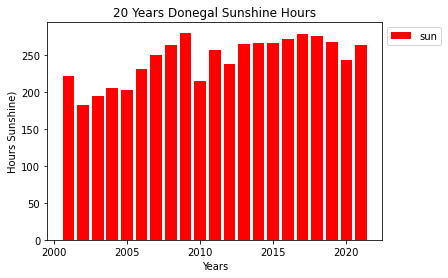

In [60]:
import matplotlib.pyplot as plt

x = DonegalMonthlyData['year']
w = DonegalMonthlyData['sun']

# Plot a simple line chart
plt.bar(x, w, color="red", label="sun")

plt.xlabel("Years")
plt.ylabel("Hours Sunshine)")
plt.title("20 Years Donegal Sunshine Hours")

plt.legend(bbox_to_anchor=(1,1), loc="upper left") 
plt.show()

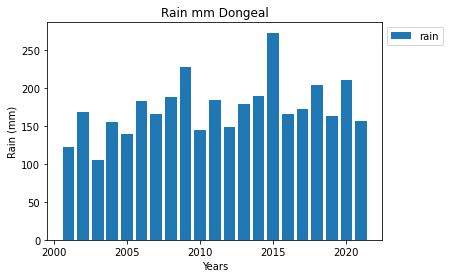

In [61]:

x = DonegalMonthlyData['year']
w = DonegalMonthlyData['rain']


# Plot a simple line chart
plt.bar(x, w, label="rain")

plt.xlabel("Years")
plt.ylabel("Rain (mm)")
plt.title("Rain mm Dongeal")

plt.legend(bbox_to_anchor=(1,1), loc="upper left") 
plt.show()

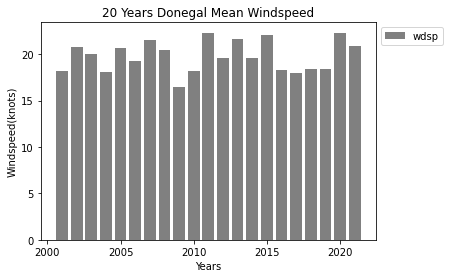

In [62]:
x = DonegalMonthlyData['year']
w = DonegalMonthlyData['wdsp']

# Plot a simple line chart
plt.bar(x, w, color="gray", label="wdsp")

plt.xlabel("Years")
plt.ylabel("Windspeed(knots)")
plt.title("20 Years Donegal Mean Windspeed")

plt.legend(bbox_to_anchor=(1,1), loc="upper left") 
plt.show()

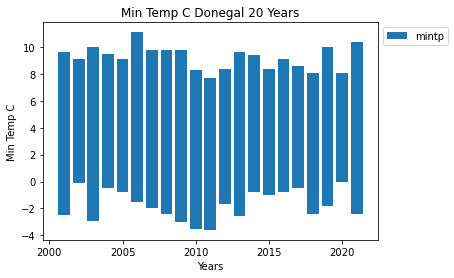

In [63]:
x = DonegalMonthlyData['year']
w = DonegalMonthlyData['mintp']


# Plot a simple line chart
plt.bar(x, w, label="mintp")

plt.xlabel("Years")
plt.ylabel("Min Temp C")
plt.title("Min Temp C Donegal 20 Years")

plt.legend(bbox_to_anchor=(1,1), loc="upper left") 
plt.show()

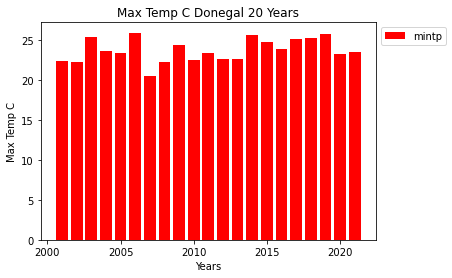

In [64]:
x = DonegalMonthlyData['year']
w = DonegalMonthlyData['maxtp']


# Plot a simple line chart
plt.bar(x, w, label="mintp", color='red')

plt.xlabel("Years")
plt.ylabel("Max Temp C")
plt.title("Max Temp C Donegal 20 Years")

plt.legend(bbox_to_anchor=(1,1), loc="upper left") 
plt.show()